In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger
import os
import sys
from sklearn.preprocessing import StandardScaler
root = "/project/wyin/jlee/ml-project/"
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
from inverse_utilities import InverseNeuralNet, ScaledData, see_results

data_loc = os.path.join(root, "inverse-shifted/data")
model_loc = os.path.join(root, "inverse-shifted/neural-nets/hyperparameters/logs/arch-search-15-min-2")

test_path = os.path.join(model_loc, "[354, 256, 128, 64, 32, 3],0.001,128,0.5/version_0/")

print(os.listdir(test_path))

['events.out.tfevents.1658787004.node055.214687.0', 'checkpoints', 'hparams.yaml', 'events.out.tfevents.1658787905.node055.214687.1']


In [2]:
data = ScaledData(data_loc)

In [5]:
check_path = os.path.join(test_path, 'checkpoints')
check_loc = os.path.join(check_path, os.listdir(check_path)[0])
model = InverseNeuralNet.load_from_checkpoint(check_loc)

In [6]:
test_dos_tensor = torch.from_numpy(data.test_dos).float()
predicted = model(test_dos_tensor).detach().numpy()

mse_mat = (predicted - data.test_params) ** 2
mse_list = np.mean(mse_mat, axis = 1)
print(f"model mse: {np.mean(mse_list)}")

mse_params = zip(mse_list, predicted, data.test_params)
mse_params = sorted(mse_params, key = lambda x: x[0], reverse = True)

model mse: 6.290072639542043e-07


In [7]:
print("Neural net results: ")
for i in range(10):
    print(f"Percentile {i}:")
    index = i * (len(mse_params) // 100)
    t1_truth, t2_truth, j_truth = mse_params[index][2]
    print(f"Ground truth: t1: {t1_truth}, t2: {t2_truth}, J: {j_truth}")
    
    t1_pred, t2_pred, j_pred = mse_params[index][1]
    print(f"Predicted: t1: {t1_pred:.4f}, t2: {t2_pred:.4f}, J: {j_pred:.4f}")
    
    print()

Neural net results: 
Percentile 0:
Ground truth: t1: -0.38, t2: 0.5, J: 0.2
Predicted: t1: -0.3869, t2: 0.4968, J: 0.2006

Percentile 1:
Ground truth: t1: -0.18, t2: 0.4, J: 0.888
Predicted: t1: -0.1771, t2: 0.4017, J: 0.8890

Percentile 2:
Ground truth: t1: -0.02, t2: 0.2, J: 0.264
Predicted: t1: -0.0219, t2: 0.2006, J: 0.2662

Percentile 3:
Ground truth: t1: -0.5, t2: 0.48, J: 0.36
Predicted: t1: -0.4983, t2: 0.4812, J: 0.3617

Percentile 4:
Ground truth: t1: -0.26, t2: 0.26, J: 0.536
Predicted: t1: -0.2579, t2: 0.2610, J: 0.5351

Percentile 5:
Ground truth: t1: -0.4, t2: 0.02, J: 0.696
Predicted: t1: -0.4013, t2: 0.0179, J: 0.6962

Percentile 6:
Ground truth: t1: -0.04, t2: 0.02, J: 0.296
Predicted: t1: -0.0392, t2: 0.0188, J: 0.2942

Percentile 7:
Ground truth: t1: -0.44, t2: 0.46, J: 0.392
Predicted: t1: -0.4414, t2: 0.4588, J: 0.3933

Percentile 8:
Ground truth: t1: -0.22, t2: 0.26, J: 0.344
Predicted: t1: -0.2181, t2: 0.2607, J: 0.3446

Percentile 9:
Ground truth: t1: -0.3, t2: 

Neural net results
model mse: 6.290072639542043e-07


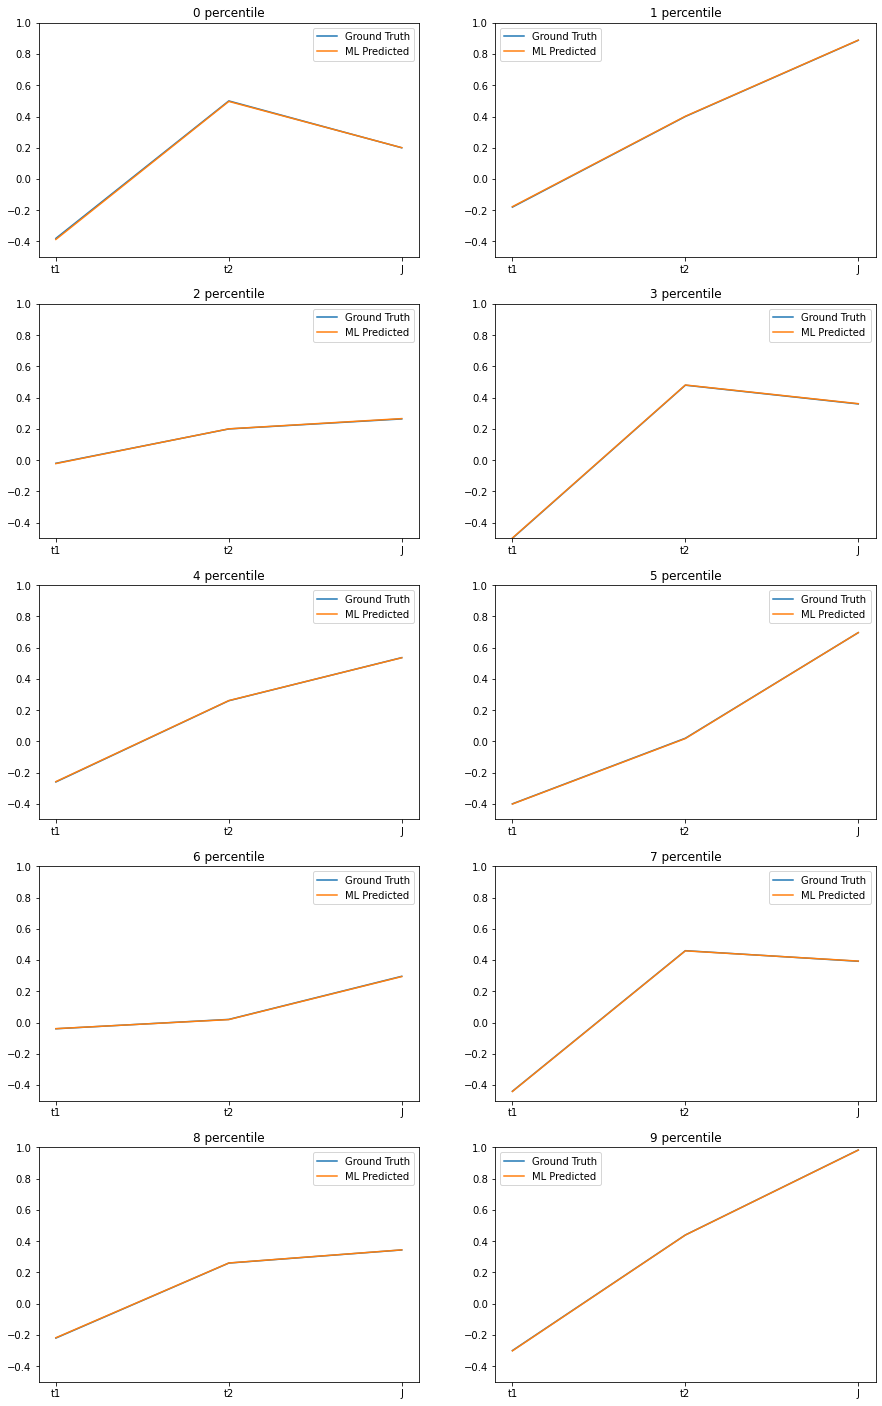

In [8]:
print("Neural net results")
see_results(predicted, data.test_params, (5, 2), np.arange(0, 10, 1))